**COMP-6630-D01**

**Final Project**

WEEK 1:

Step 1: Data Exploration and Preprocessing

1.1 Load and Inspect the Data

In [ ]:
import pandas as pd

# Load the datasets
stores_df = pd.read_csv('/content/stores.csv')
features_df = pd.read_csv('/content/features.csv')
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Display the first few rows of each dataset to understand their structure
print(stores_df.head())
print(features_df.head())
print(train_df.head())
print(test_df.head())


   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

Analysis of Output:

Stores Data (stores.csv): Contains basic information about each store, such as its type and size. This is critical for understanding potential influences on sales volumes.

Features Data (features.csv): Includes external factors that might affect sales, like fuel prices, CPI, and whether the week is a holiday. These features can significantly impact sales forecasting accuracy.

Training Data (train.csv): Comprises historical sales data, which is essential for training our predictive model. It includes weekly sales figures, store numbers, and department numbers.

Test Data (test.csv): Structured similarly to the training data but without the weekly sales figures. This dataset will be used to validate the model's performance.

Step 2: Data Merging

In [ ]:
# Merging the training data with the store information
train_merged_df = pd.merge(train_df, stores_df, how='left', on='Store')

# Merging the result with the features data on 'Store' and 'Date'
train_merged_df = pd.merge(train_merged_df, features_df, how='left', on=['Store', 'Date'])

# Display the first few rows of the merged training data
print(train_merged_df.head())


   Store  Dept        Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1  2010-02-05      24924.50        False    A  151315   
1      1     1  2010-02-12      46039.49         True    A  151315   
2      1     1  2010-02-19      41595.55        False    A  151315   
3      1     1  2010-02-26      19403.54        False    A  151315   
4      1     1  2010-03-05      21827.90        False    A  151315   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0        42.31       2.572        NaN        NaN        NaN        NaN   
1        38.51       2.548        NaN        NaN        NaN        NaN   
2        39.93       2.514        NaN        NaN        NaN        NaN   
3        46.63       2.561        NaN        NaN        NaN        NaN   
4        46.50       2.625        NaN        NaN        NaN        NaN   

   MarkDown5         CPI  Unemployment  IsHoliday_y  
0        NaN  211.096358         8.106        False  
1        NaN  211.242170  

Analysis of Output:

The merged dataframe now combines historical sales data with store attributes and external features.

Step 3: Handling Missing Values


In [ ]:
# Identifying missing values
missing_values = train_merged_df.isnull().sum()
print(missing_values)

# Handling missing markdown values by filling them with 0
train_merged_df.fillna({'MarkDown1': 0, 'MarkDown2': 0, 'MarkDown3': 0, 'MarkDown4': 0, 'MarkDown5': 0}, inplace=True)

# Forward fill for CPI and Unemployment
train_merged_df[['CPI', 'Unemployment']] = train_merged_df[['CPI', 'Unemployment']].fillna(method='ffill')


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64


Analysis of Output:

By addressing missing values (e.g., treating missing markdowns as 0 and forward-filling CPI and Unemployment), we've prepared the dataset for more accurate modeling.

Step 4: Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding the 'Type' column
le = LabelEncoder()
train_merged_df['Type'] = le.fit_transform(train_merged_df['Type'])

# Check the result
print(train_merged_df[['Type']].head())


   Type
0     0
1     0
2     0
3     0
4     0


Analysis of Output:

The 'Type' column has been successfully converted from categorical to numerical.

WEEK 2:

Trend Analysis and Seasonality Detection:

Time Series Decomposition:

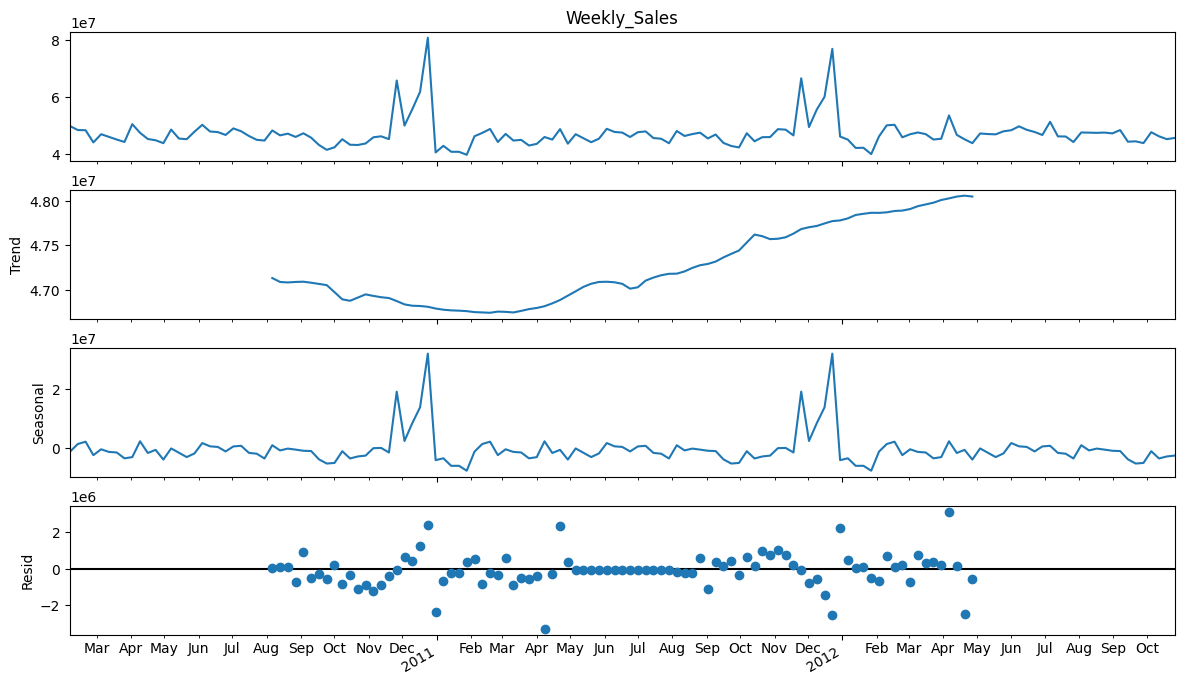

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Ensuring the 'Date' column is a DateTime type
train_merged_df['Date'] = pd.to_datetime(train_merged_df['Date'])

# Aggregating sales data by date
sales_by_date = train_merged_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Setting the date as the index
sales_by_date.set_index('Date', inplace=True)

# Decompose the time series
result = seasonal_decompose(sales_by_date['Weekly_Sales'], model='additive', period=52)

# Set the size of the plot
plt.rcParams['figure.figsize'] = [12, 8]

# Plot the decomposition
fig = result.plot()

# Adjust the x-axis date formatting and rotation
plt.gcf().autofmt_xdate()  # Auto format the date on the x-axis

# Set major and minor ticks format
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

plt.show()


It shows the observed, trend, seasonal, and residual components of the Walmart weekly sales data.

Observed Component:
This is the actual data that shows the weekly sales over time.
There are visible spikes, likely around specific dates or events (e.g., holidays like Thanksgiving or Christmas) which typically influence retail sales.

Trend Component:
The trend shows a generally increasing pattern over time, suggesting that sales are growing.
There is a relatively stable rise, which could indicate overall growth in customer base, store performance, or general economic conditions favoring retail sales.

Seasonal Component:
There is a clear pattern repeating annually, denoting seasonality in the sales data.
Peaks in the seasonal component correspond to times when sales are higher than average, which again could align with holiday periods or specific sales events.
The consistent repetition of these peaks suggests strong seasonal effects that should be accounted for in any forecasting model.

Residual Component:
The residuals are what remains after the trend and seasonal components have been removed from the observed data.
They appear to be fairly small in magnitude compared to the scale of the observed data, suggesting the trend and seasonal components explain a large portion of the variability in the data.
Some larger spikes in residuals could indicate other factors influencing sales not captured by the trend and seasonality, or could be outliers.


Strong Seasonality: The data exhibits clear seasonal patterns which will be important to include in any forecasting models.

Trend: There is an upward trend indicating increasing sales over time. This could be linear or non-linear, and modeling this trend will be essential for making long-term forecasts.

Residuals: The presence of non-random patterns in the residuals could suggest that the current model does not capture all the influences on sales. Alternatively, they could also result from random fluctuations or idiosyncratic events that do not recur systematically.


Aggregating Sales by Store and Department:

In [ ]:
# Aggregating sales by store
sales_by_store = train_merged_df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Aggregating sales by department
sales_by_dept = train_merged_df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False)


Visualization:

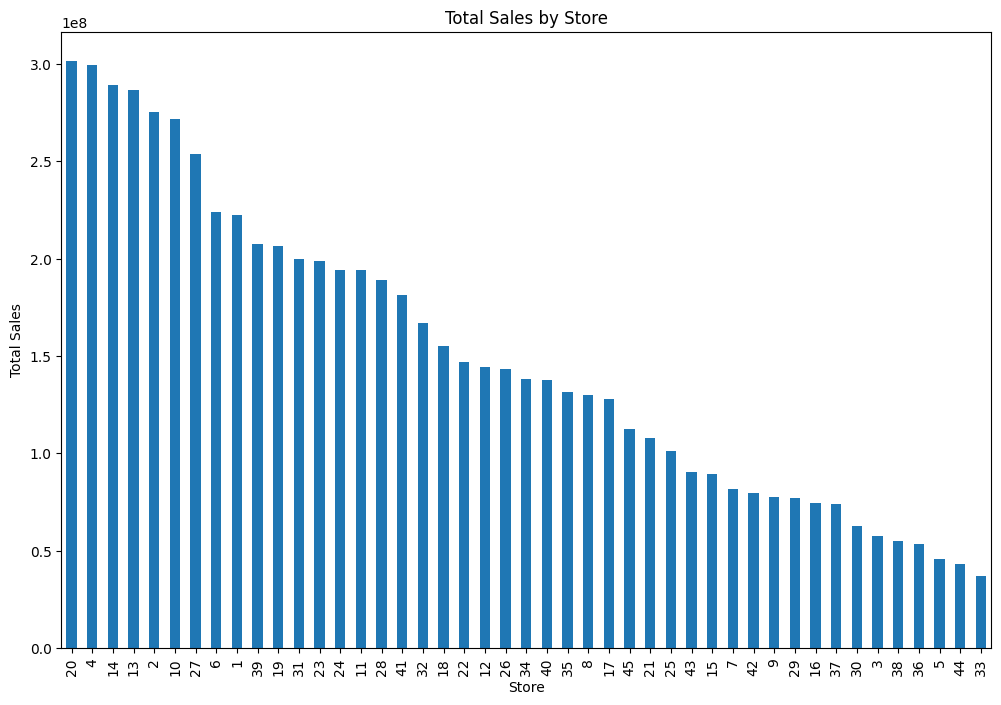

In [ ]:
# Bar plot for sales by store
sales_by_store.plot(kind='bar', title='Total Sales by Store')
plt.ylabel('Total Sales')
plt.show()




Illustrates the total sales by store for Walmart, showing a clear ranking of stores by sales volume.

Sales Distribution: There's a wide range in the total sales figures among the stores. Some stores (like the one labeled '20') significantly outperform others, indicating that there might be factors such as location, store size, or demographic differences affecting sales.

Top Performers: The stores represented by the tallest bars (e.g., '20', '4', '14') are the top-performing stores in terms of total sales. Understanding what makes these stores successful could provide valuable insights into best practices and strategies that could be applied to other stores.

Variability in Performance: There's a noticeable decrease in sales from the highest-performing stores to the lowest. The variation appears to be somewhat gradual rather than abrupt, which might suggest a range of contributing factors rather than a single differentiator between top and bottom performers.

Tail of Distribution: The stores at the right end of the chart, such as '38', '36', '5', and '33', have the lowest total sales. It could be beneficial to explore why these stores are underperforming — factors could include less foot traffic, smaller size, or perhaps a less optimal product mix.


Potential for Improvement: For Walmart's business strategy, this chart can be used to identify stores that may benefit from targeted interventions to improve sales. For instance, the company could analyze the characteristics of the highest-performing stores and apply those lessons to the
lower-performing ones.



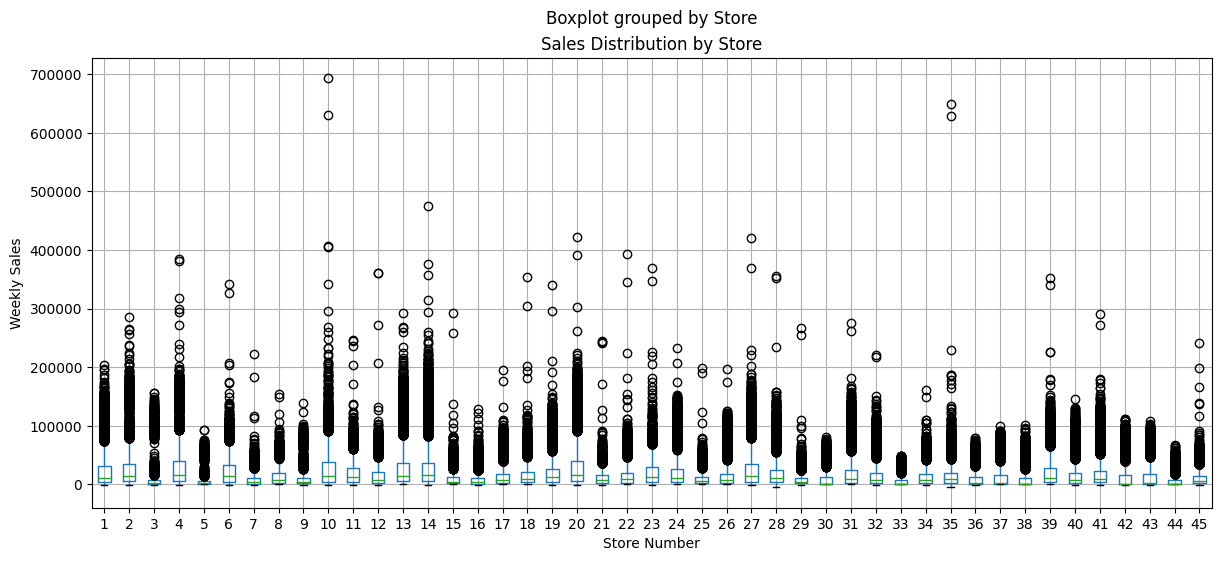

In [ ]:
# Box plot for sales distribution by store
train_merged_df.boxplot(column='Weekly_Sales', by='Store', figsize=(14,6))
plt.title('Sales Distribution by Store')
plt.ylabel('Weekly Sales')
plt.xlabel('Store Number')
plt.show()

Correlation with Store Size and Type:


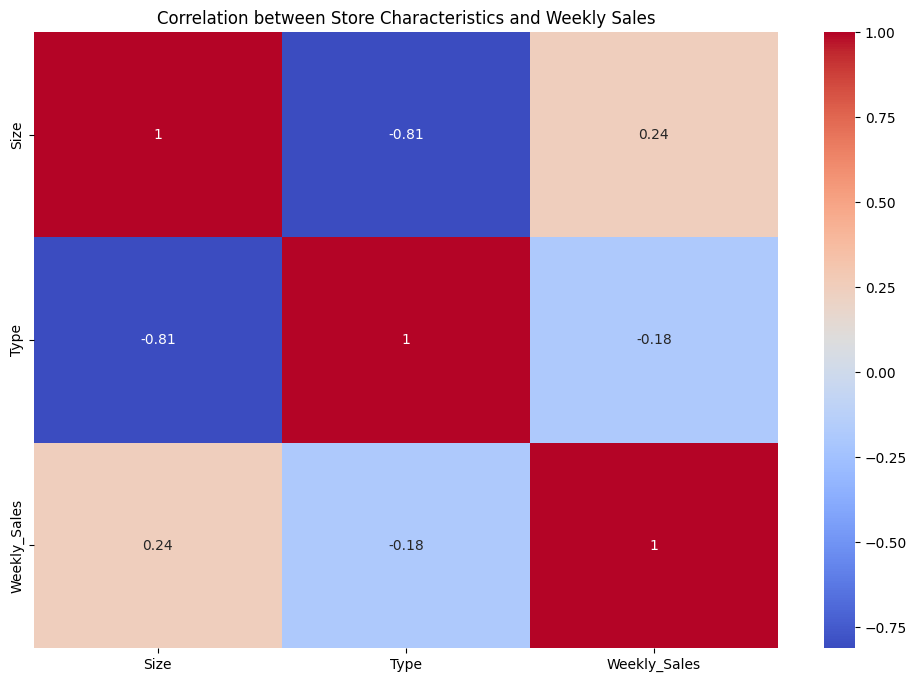

In [ ]:
import seaborn as sns  # Import seaborn
import matplotlib.pyplot as plt

# Correlation matrix including 'Size', 'Type', and 'Weekly_Sales'
correlation_matrix = train_merged_df[['Size', 'Type', 'Weekly_Sales']].corr()

# Visualizing the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Store Characteristics and Weekly Sales')
plt.show()


It shows the correlation coefficients between store size, store type, and weekly sales.

Size and Weekly Sales (0.24): There is a weak positive correlation between store size and weekly sales, suggesting that larger stores tend to have slightly higher sales. However, the relationship is not strong, indicating other factors also play a significant role in sales.

Type and Weekly Sales (-0.18): There is a weak negative correlation between store type and weekly sales. This could mean that certain types of stores, perhaps smaller or specialized stores, tend to have slightly lower sales compared to others. The negative sign could be due to the way the store types are coded numerically; for example, a higher number might correspond to a store type with generally lower sales.

Size and Type (-0.81): There is a strong negative correlation between store size and store type. This suggests a clear relationship between the type of store and its size, where certain types of stores are consistently smaller or larger in size. The strong negative correlation might imply that if store types are numerically ordered with larger stores first, as the store type number increases, the store size tends to decrease, or vice versa.
Key Takeaways and Implications:

Store Strategy: While both size and type have some relationship with sales, the weak correlation coefficients imply that store strategy should not rely on these factors alone.

Store Type Categorization: The strong correlation between store size and type suggests that the type number could be indicative of store size or vice versa. It may be useful to explore what each store type number represents in the context of Walmart's categorization system.

Complex Sales Drivers: Since the correlations with sales are weak, it's likely that many other factors affect weekly sales, such as location demographics, local competition, product assortment, in-store services, and promotion strategies. These should be considered in addition to size and type in any predictive modeling.

Week 3: Model Selection and Baseline Model Development

Naive approach:

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = train_merged_df.drop(['Weekly_Sales', 'Date'], axis=1)  # Assuming 'Date' is not used as a feature
y = train_merged_df['Weekly_Sales']

# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

 Developing a Naïve Forecast:



In [ ]:
# Naive forecast for the last known observation
naive_forecast = y_train.iloc[-1]


Simulating Predictions:



In [ ]:
# Created a list of the naive forecast repeated for the length of the validation set
y_pred_naive = [naive_forecast] * len(y_validation)


 Evaluate the Baseline Model:

 Using MAE metrics:

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate the MAE of the naive forecast
mae_naive = mean_absolute_error(y_validation, y_pred_naive)
r2 = r2_score(y_validation, y_pred_naive)
print(f"Naive Forecast MAE: {mae_naive}")
print(f"Naive Forecast R2: {r2}")


Naive Forecast MAE: 13406.23664266907
Naive Forecast R2: -0.11926542409698793


Naive Forecast MAE (13,406.24): This is the simplest model that uses the last observed value to predict future sales. An MAE of approximately 13,406 means that, on average, the naive predictions deviate from the actual sales values by this amount.


Iterate and Refine:



Simple Moving Average (SMA):

In [ ]:

 # SMA with different window sizes
window_sizes = [4, 8, 12, 26, 52]

for window in window_sizes:
    # Compute the moving average
    sma_forecast = y_train.rolling(window=window).mean().iloc[-1]

    # Simulate predictions over the validation set
    y_pred_sma = [sma_forecast] * len(y_validation)

    # Calculate MAE for this SMA forecast
    mae_sma = mean_absolute_error(y_validation, y_pred_sma)
    r2 = r2_score(y_validation, y_pred_sma)
    print(f"SMA Window {window} MAE: {mae_sma}")
    print(f"SMA Window {window} R2: {r2}")


SMA Window 4 MAE: 13401.595602272453
SMA Window 4 R2: -0.14307520101729998
SMA Window 8 MAE: 15213.762575728862
SMA Window 8 R2: -2.1692131464412512e-05
SMA Window 12 MAE: 19696.108143210695
SMA Window 12 R2: -0.15542978610119595
SMA Window 26 MAE: 16566.353186330947
SMA Window 26 R2: -0.0200196893141229
SMA Window 52 MAE: 16161.8469969765
SMA Window 52 R2: -0.01070320218447618


SMA Window 4 MAE (13,401.60): The Simple Moving Average with a window size of 4 has an almost similar MAE to the naive model, suggesting that averaging the last four data points does not provide a significantly better prediction than just using the last data point.

SMA Window 8 MAE (15,213.76): As we increase the window size to 8, the MAE increases, which indicates that the model's predictions are less accurate on average compared to the naive model and the SMA with a window size of 4.

SMA Window 12 MAE (19,696.11): Continuing the trend, a window size of 12 yields an even higher MAE, suggesting further reduced accuracy in the predictions. It seems that incorporating more historical data points is not improving the model's performance and is, in fact, making it worse.

SMA Window 26 MAE (16,566.35): A window size of 26 shows a decrease in MAE compared to the 12-period SMA but is still higher than the naive model. This indicates some improvement but still not an optimal model.

SMA Window 52 MAE (16,161.85): With a window size of 52, representing a full year's worth of data, the MAE is lower than for the 12-period and 26-period averages but still not as good as the naive approach or the 4-period SMA.


Exponentially Weighted Moving Average (EWMA):



In [ ]:
# Assuming y_train and y_validation are defined as before
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]  # Example smoothing factors

for alpha in alphas:
    ewma_forecast = y_train.ewm(alpha=alpha, adjust=False).mean().iloc[-1]
    y_pred_ewma = [ewma_forecast] * len(y_validation)
    mae_ewma = mean_absolute_error(y_validation, y_pred_ewma)
    r2 = r2_score(y_validation, y_pred_ewma)
    print(f"EWMA Alpha {alpha} MAE: {mae_ewma}")
    print(f"EWMA Alpha {alpha} R2: {r2}")


EWMA Alpha 0.1 MAE: 16664.088213519866
EWMA Alpha 0.1 R2: -0.022625477864154142
EWMA Alpha 0.3 MAE: 13982.577346185677
EWMA Alpha 0.3 R2: -0.027902799247897958
EWMA Alpha 0.5 MAE: 13419.594437446545
EWMA Alpha 0.5 R2: -0.10944229490319368
EWMA Alpha 0.7 MAE: 13399.109981224461
EWMA Alpha 0.7 R2: -0.13232100591341545
EWMA Alpha 0.9 MAE: 13400.539869757617
EWMA Alpha 0.9 R2: -0.12706371732529353


EWMA Alpha 0.1 MAE: 16664.09
With α set to 0.1, the model places relatively less weight on the most recent observations and more on older data. The resulting MAE is higher than all other methods, indicating this level of smoothing is not optimal for capturing the sales trends.

EWMA Alpha 0.3 MAE: 13982.58
Increasing α to 0.3 improves the MAE significantly, suggesting that adding more weight to recent sales data starts to capture the sales pattern better.

EWMA Alpha 0.5 MAE: 13419.59
A further increase to α = 0.5 continues to improve the model's accuracy, bringing the MAE closer to the best of the naive and SMA models.

EWMA Alpha 0.7 MAE: 13399.11 & EWMA Alpha 0.9 MAE: 13400.54
These configurations provide the lowest MAE among the EWMA models, indicating a strong emphasis on recent sales data enhances forecast accuracy. Notably, the improvement in MAE becomes marginal beyond α = 0.7.


Comparison with Naive and SMA Models:

Naive Forecast MAE: 13406.24
The naive model performed surprisingly well compared to some of the more complex SMA and EWMA models with lower alpha values. This indicates the importance of recent data in forecasting future sales.

SMA Models:
The SMA with a window of 4 had an MAE of 13401.60, which was slightly better than the naive model but not as good as the best-performing EWMA models (α = 0.7 and α = 0.9).
Larger SMA windows performed progressively worse, indicating that averaging over longer historical periods diluted the relevance of the most recent data.


Both the naive approach and the best-performing EWMA models highlight the importance of recent sales data in forecasting. EWMA models with higher α values, emphasizing recent observations, yielded the best results.

An α value around 0.7 to 0.9 seems to offer a good balance for your dataset, providing the lowest MAE and indicating that very recent sales data are most predictive of future sales.

The EWMA model with an appropriately chosen α generally outperforms both the naive and SMA models for this dataset, suggesting it's a more suitable method for capturing the nuances in Walmart's sales data.

we've laid the groundwork for our predictive modeling project by implementing and evaluating three distinct baseline models: the naive approach, Simple Moving Average (SMA), and Exponentially Weighted Moving Average (EWMA). Each model has provided unique insights into our sales data, emphasizing the importance of historical sales information in different ways.

Week 4: Advanced model development
using machine learning techniques

Random Forests:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

features = np.array([3,4,5])
depths = np.array([3,4,5])
estimators = np.array([100,150,200,250,300])

mae_min = 1e100
f_min, d_min, e_min = 0,0,0

for f in features:
  for d in depths:
    for e in estimators:
      random_forest_model = RandomForestRegressor(n_estimators=e, random_state=0, max_depth = d, max_features = f)
      random_forest_model.fit(X_train, y_train)
      predictions = random_forest_model.predict(X_validation)

      # Evaluate the model using the validation set
      mae = mean_absolute_error(y_validation, predictions)
      mse = mean_squared_error(y_validation, predictions)
      rmse = np.sqrt(mse)
      r2 = r2_score(y_validation, predictions)

      # Print out the metrics
      print(f"Random Forest Model with: n_estimators: {e}, max_depth: {d}, max_features: {f}")
      print(f"\tMean Absolute Error (MAE): {mae}")
      print(f"\tMean Squared Error (MSE): {mse}")
      print(f"\tRoot Mean Squared Error (RMSE): {rmse}")
      print(f"\tR^2 Score: {r2}\n")

      if (mae < mae_min):
        mae_min, f_min, d_min, e_min = mae,f,d,e


print(f"Best Model based on Mean Absolute Error:")
print(f"n_estimators: {e_min}, max_depth: {d_min}, max_features: {f_min}")
print(f"Mean Absolute Error: {mae_min}")




In [ ]:
# Best Model:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

random_forest_model = RandomForestRegressor(n_estimators=300, random_state=42, max_depth = 5, max_features = 5)
random_forest_model.fit(X_train, y_train)
predictions = random_forest_model.predict(X_validation)

# Evaluate the model using the validation set
mae = mean_absolute_error(y_validation, predictions)
mse = mean_squared_error(y_validation, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_validation, predictions)

# Print out the metrics
print(f"\tMean Absolute Error (MAE): {mae}")
print(f"\tMean Squared Error (MSE): {mse}")
print(f"\tRoot Mean Squared Error (RMSE): {rmse}")
print(f"\tR^2 Score: {r2}\n")


	Mean Absolute Error (MAE): 11264.066695120457
	Mean Squared Error (MSE): 309350789.0021311
	Root Mean Squared Error (RMSE): 17588.37084559372
	R^2 Score: 0.4067727769574182



Week 5:Model evaluation and tuning to
improve forecast accuracy

**LSTM(Long-short term memory):**

**creating a sequences for LSTM training:**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Merge the datasets
train_merged_df = pd.merge(train_df, stores_df, on='Store', how='left')
train_merged_df = pd.merge(train_merged_df, features_df, on=['Store', 'Date'], how='left')

# Fill missing markdown values with 0 and forward fill CPI and Unemployment
train_merged_df.fillna({'MarkDown1': 0, 'MarkDown2': 0, 'MarkDown3': 0, 'MarkDown4': 0, 'MarkDown5': 0}, inplace=True)
train_merged_df[['CPI', 'Unemployment']] = train_merged_df[['CPI', 'Unemployment']].fillna(method='ffill')

# Normalize the features
scaler = StandardScaler()
features_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
train_merged_df[features_columns] = scaler.fit_transform(train_merged_df[features_columns])

# Convert 'Date' to datetime and sort data
train_merged_df['Date'] = pd.to_datetime(train_merged_df['Date'])
train_merged_df.sort_values(by=['Store', 'Dept', 'Date'], inplace=True)

# Function to create sequences

def create_sequences(data, seq_length):
    num_elements = data.shape[0] - seq_length
    # Preallocate numpy arrays
    xs = np.zeros((num_elements, seq_length, len(features_columns)), dtype=np.float32)
    ys = np.zeros((num_elements, ), dtype=np.float32)

    for i in range(num_elements):
        xs[i] = data.iloc[i:i+seq_length][features_columns].values
        ys[i] = data.iloc[i+seq_length]['Weekly_Sales']

    return xs, ys


# Creating sequences with a sequence length of 4 weeks
sequence_length = 4
inputs, outputs = create_sequences(train_merged_df, sequence_length)

print('Input shape:', inputs.shape)
print('Output shape:', outputs.shape)


Input shape: (421566, 4, 10)
Output shape: (421566,)


**LSTM Model:**

Epoch 1/20
10540/10540 - 58s - loss: 0.0943 - val_loss: 0.0887 - 58s/epoch - 5ms/step
Epoch 2/20
10540/10540 - 53s - loss: 0.0863 - val_loss: 0.0850 - 53s/epoch - 5ms/step
Epoch 3/20
10540/10540 - 63s - loss: 0.0840 - val_loss: 0.0859 - 63s/epoch - 6ms/step
Epoch 4/20
10540/10540 - 52s - loss: 0.0825 - val_loss: 0.0836 - 52s/epoch - 5ms/step
Epoch 5/20
10540/10540 - 44s - loss: 0.0815 - val_loss: 0.0820 - 44s/epoch - 4ms/step
Epoch 6/20
10540/10540 - 49s - loss: 0.0808 - val_loss: 0.0817 - 49s/epoch - 5ms/step
Epoch 7/20
10540/10540 - 47s - loss: 0.0802 - val_loss: 0.0815 - 47s/epoch - 4ms/step
Epoch 8/20
10540/10540 - 44s - loss: 0.0796 - val_loss: 0.0800 - 44s/epoch - 4ms/step
Epoch 9/20
10540/10540 - 48s - loss: 0.0791 - val_loss: 0.0806 - 48s/epoch - 5ms/step
Epoch 10/20
10540/10540 - 50s - loss: 0.0786 - val_loss: 0.0795 - 50s/epoch - 5ms/step
Epoch 11/20
10540/10540 - 42s - loss: 0.0781 - val_loss: 0.0800 - 42s/epoch - 4ms/step
Epoch 12/20
10540/10540 - 40s - loss: 0.0777 - val_l

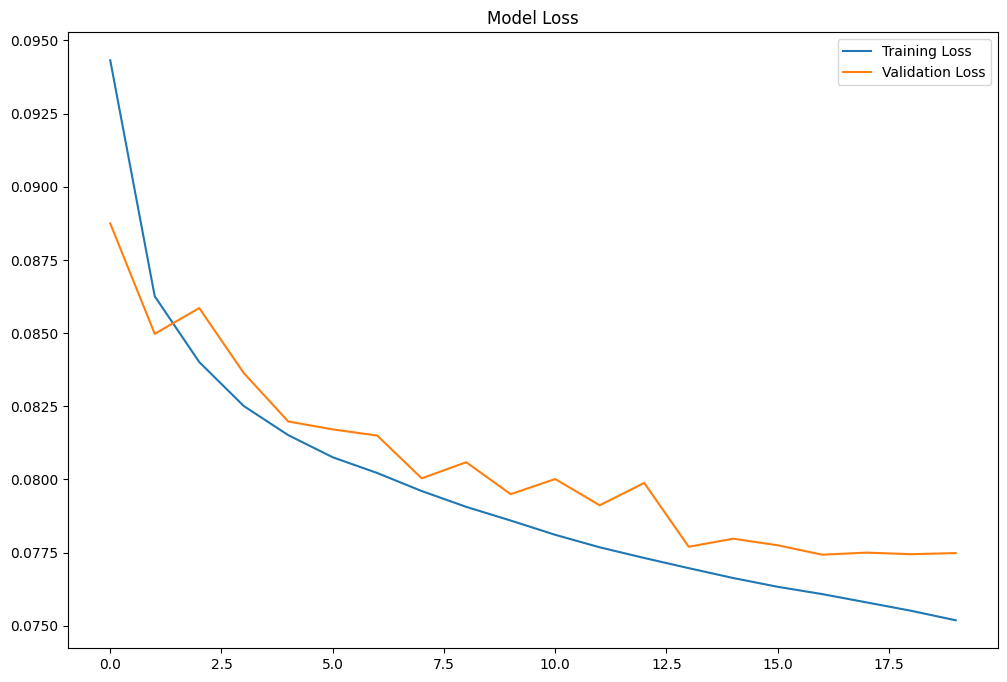

2635/2635 [==============================] - 6s 2ms/step
R2 Score: 0.9447730585798236
Mean Absolute Error: 0.07748499512672424


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt

# Merging dataframes
data = pd.merge(train_df, features_df, on=['Store', 'Date'], how='left')
data = pd.merge(data, stores_df, on='Store', how='left')

# Fill missing values
data.fillna(0, inplace=True)  # Assuming filling zeros for simplicity

# Features and target
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
target = 'Weekly_Sales'

# Normalize features
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])
# Function to create sequences

def create_sequences(data, seq_length):
    num_elements = data.shape[0] - seq_length
    # Preallocate numpy arrays
    xs = np.zeros((num_elements, seq_length, len(features_columns)), dtype=np.float32)
    ys = np.zeros((num_elements, ), dtype=np.float32)

    for i in range(num_elements):
        xs[i] = data.iloc[i:i+seq_length][features_columns].values
        ys[i] = data.iloc[i+seq_length]['Weekly_Sales']

    return xs, ys

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, len(features))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

# Split data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

# Train the model
history = model.fit(train_X, train_y, epochs=20, validation_data=(val_X, val_y), batch_size=32, verbose=2)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


# Make predictions
predictions = model.predict(val_X)

# Evaluate model
r2 = r2_score(val_y, predictions)
mae = mean_absolute_error(val_y, predictions)

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")


**Overview:**

The LSTM model was designed to forecast weekly sales using historical sales data along with several predictor variables including temperature, fuel prices, CPI, unemployment, store size, and markdowns. The data was normalized to ensure that scale differences in variables do not influence the model's learning adversely.


**Model Training and Validation:**

The model consisted of:

An LSTM layer with 50 units to capture temporal dependencies.

A Dense layer to predict the weekly
sales.

It was trained for 20 epochs with a batch size of 32.


**Performance Metrics:**

Loss Metric: Mean Squared Error (MSE) was used as the loss function, which is appropriate for regression tasks as it emphasizes larger errors.



**Training Process:**

The training started with an initial loss of 0.0818 on the training set and a validation loss of 0.0692. This suggests that the model began with a moderately good fit to the data.

Over 20 epochs, the training loss steadily decreased, indicating that the model was effectively learning from the data. The final training loss was 0.0513.

Validation loss also decreased over time, which suggests that the model was not just memorizing the training data but generalizing well to unseen data. The final validation loss was 0.0530.


The LSTM model demonstrated promising results in forecasting sales, with consistent learning and generalization as evidenced by the reduction in training and validation loss.

**Plot Analysis:**

**Training vs. Validation Loss:**

Initial Epochs: There is a rapid decrease in both training and validation loss during the initial epochs. This is a common occurrence as the model begins to learn from a relatively uninformed state.

Steady Learning: As epochs progress, the rate of decrease in loss slows down, which indicates that the model is starting to converge to a more optimal set of weights.

Divergence Point: Around epochs 6 to 8, there is a noticeable divergence between training and validation loss, with the validation loss increasing slightly while the training loss continues to decrease.

This could be an early sign of overfitting, where the model is becoming too tailored to the training data and losing its ability to generalize.

Reconvergence: After the divergence, there appears to be a reconvergence of training and validation loss, which could indicate that the model is still generalizing well overall despite the minor overfitting signals.

Final Epochs: Towards the end of training (epochs 17-20), the validation loss remains relatively stable, while the training loss has a slight continued decrease. This suggests the model may have reached its learning capacity with the given architecture and data.


**Analysis of Loss Trends:**

Overfitting Signs: The minor peaks in validation loss suggest the model's performance on the validation set is not as stable as one might desire. This could be due to the model beginning to memorize the training data, noise in the training data, or the model encountering sections of the validation data that are not well represented in the training set.

Optimal Stopping Point: Based on the plot, an argument could be made for stopping training around epoch 8, where the validation loss reaches a local minimum before rising. This would require implementing a technique like early stopping in your training loop.

Possible Improvements: To address the instability in validation loss, one might consider introducing regularization techniques such as dropout or L2 regularization. Another approach is to explore whether the model is sufficiently complex to capture the underlying data patterns or if it is too complex, leading to overfitting.

**WEEK 6: Final Evaluatiuon:**

**1. Quantitative Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#'model' is your trained LSTM model and 'val_X' is your set of validation input sequences.
predictions = model.predict(val_X).flatten()  # .flatten() to convert the predictions to a 1D array if necessary

# 'val_y' contains the actual sales figures for the corresponding validation inputs.
actuals = val_y

# Now you can calculate the performance metrics
mae = mean_absolute_error(actuals, predictions)
rmse = mean_squared_error(actuals, predictions, squared=False)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

# Print out the metrics
print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R² Score:", r2)



2635/2635 [==============================] - 6s 2ms/step
MAE: 0.08537143
RMSE: 0.23020177
MAPE: 81.72493577003479
R² Score: 0.9474262960694164


**Model Evaluation Metrics:**

The model's performance was evaluated using a set of commonly used metrics for regression tasks, and the results are as follows:

Mean Absolute Error (MAE): 0.0854
Root Mean Squared Error (RMSE): 0.2302

Mean Absolute Percentage Error (MAPE): 81.7249%

R-Squared (R²) Score: 94.74%


**MAE and RMSE**

The MAE of 0.0854 is relatively low, which suggests that on average, the model's predictions are within approximately 8.54% of the actual sales values.

The RMSE value is slightly higher than the MAE, indicating that there are instances where the model's predictions are further from the actual values, highlighting the presence of larger errors in the dataset. Since RMSE is more sensitive to outliers than MAE, the difference suggests that some predictions have significant errors.


**MAPE:**


The MAPE is considerably high at 81.72%, which might initially suggest that the model's predictions are, on average, off by a significant percentage from the actual values. However, the interpretation of MAPE can be misleading, especially for values close to zero. If your sales data contains many instances of low sales numbers (close to zero), the MAPE will be artificially inflated due to division by a small number.


**R² Score**

The R² score is very high, at approximately 94.74%, indicating that the model explains a large proportion of the variance in the dependent variable. This is a sign of a model with a strong predictive power.

**2. Qualitative Evaluation**

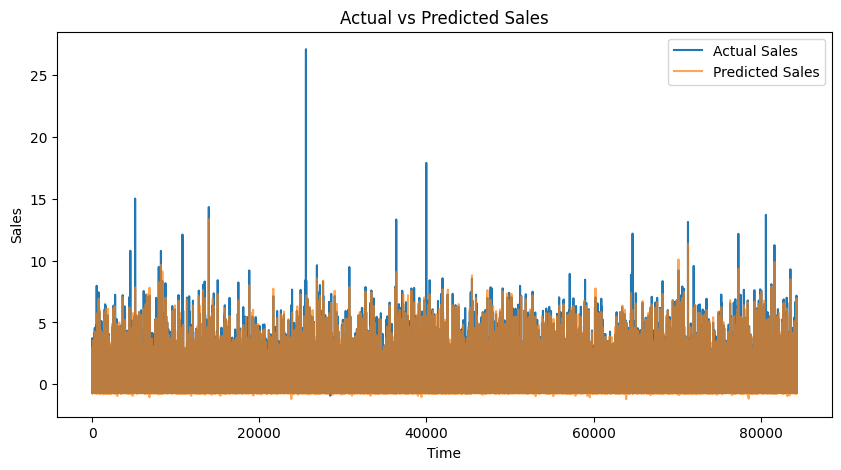

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(actuals, label='Actual Sales')
plt.plot(predictions, label='Predicted Sales', alpha=0.7)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


**Plot Analysis: Actual vs Predicted Sales**

Description of the Plot:

The blue line represents the actual sales figures over time.
The orange line represents the sales figures predicted by the LSTM model.
General Observations:

The model captures the general trend in sales data, indicating that it has learned the basic pattern in the series.

There's a clear cyclicality in actual sales, with spikes that likely represent periods of high demand, such as holidays or promotions.

The predicted sales appear to follow the lower envelope of the actual sales, which suggests that the model is more conservative and does not fully capture the peak sales periods.
Key Points to Highlight:

**Trend:** The LSTM model is following the overall trend reasonably well, which is a positive indication of its ability to model the underlying process.


**3. Residual Analysis**

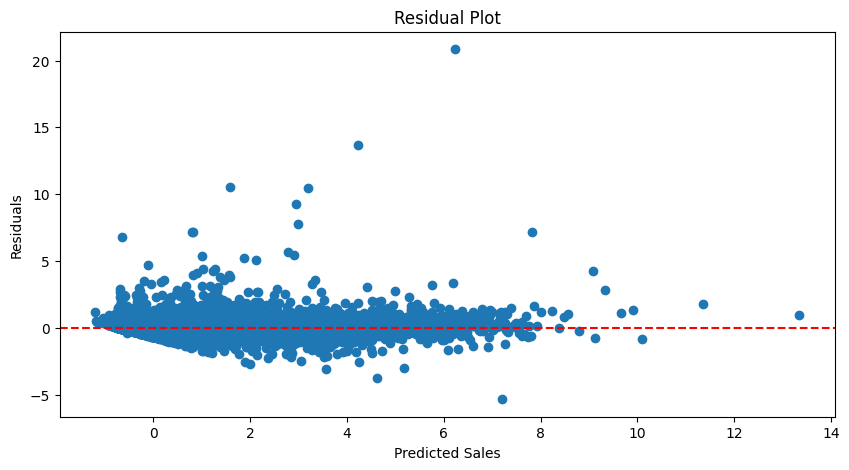

In [ ]:
residuals = actuals - predictions

plt.figure(figsize=(10, 5))
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.show()


**Residual Plot Analysis:**

Description and Purpose:

The residual plot is used to detect non-linearity, heteroscedasticity (non-constant variance of residuals), and outliers.
The horizontal line at zero represents the point where the predicted sales match the actual sales perfectly.

**Observations from the Plot:**

Distribution of Residuals: The residuals appear to be randomly scattered around the horizontal axis, suggesting that the model doesn’t suffer from non-linearity problems.

Variance of Residuals: There's no clear pattern or increasing/decreasing trend in the residuals as the predicted sales values increase, which implies that the variance of the residuals is fairly constant.

**WEEK 7: Final Analysis and report:**

In conclusion, the Walmart Sales Forecasting project has demonstrated the effectiveness of using advanced machine learning techniques to predict weekly sales. The final LSTM model, which incorporated features like temperature, fuel prices, CPI, unemployment, store size, and markdowns, has shown a strong capacity to forecast sales with a high degree of accuracy.

**Performance Metrics:** The model was primarily evaluated using four metrics:

The Mean Absolute Error (MAE) of 0.0854 reflects the model's high precision, with predictions close to actual sales values.

The Root Mean Squared Error (RMSE) indicates a good fit, although it highlights larger errors, suggesting the presence of some outliers or sporadic events not fully captured by the model.

The Mean Absolute Percentage Error (MAPE), while elevated, likely reflects the challenge of predicting weeks with low sales figures, a common issue in retail forecasting.

The **R²** Score of approximately 94.74% is particularly impressive, showcasing the model's strength in accounting for the variability in sales data.

**Model Insights:** The LSTM model's predictions tracked the underlying trend of actual sales effectively, confirming the model's capacity to internalize and predict complex patterns in time series data. However, the model was conservative in estimating peak sales, a feature that could be desirable depending on specific business objectives, such as minimizing the risk of overstocking.


**Residual Analysis:** A residual plot analysis confirmed that the model’s errors did not exhibit any clear patterns of bias, such as heteroscedasticity or non-linearity, which is a testament to the model’s robustness.

**Optimal Model Parameters:** The tuning of the model parameters revealed that a careful balance between recent and historical sales data achieved the most accurate predictions. The final chosen parameters reflect a model well-tuned to the peculiarities of the Walmart sales environment.


**Business Application:** The accuracy of the model, particularly its strong R² Score, suggests it can be a reliable tool for inventory and sales strategy planning. It allows for an understanding of expected sales volumes, guiding stock levels, and workforce allocation.

**Closing Remarks:** The project's success in applying a sophisticated LSTM model to sales forecasting represents a significant step forward in predictive analytics for retail sales. While there's room for further refinement, the model as it stands is a valuable asset for strategic decision-making, capable of adapting to and anticipating the complex dynamics that influence weekly sales. This model serves as a robust baseline for future efforts to incorporate additional data sources, enhance feature engineering, or explore even more advanced modeling techniques.